In [1]:
import numpy as np

In [12]:
class KMeans():
    def __init__(self, k=3, random_state=42, maxN_iter=10):
        self.maxN_iter = maxN_iter #最大計算回数を設定∵収束しなかったときのために
        self.prototype = None#プロトタイプを初期化
        self.k = k
        self.random_state = random_state  

    def init_prototype(self, X):#プロとライプを初期化するための関数
        np.random.seed(self.random_state)
        #データ点の中からランダムに初期プロトタイプを選ぶ（収束しやすくする）
        rand_idx = np.random.permutation(X.shape[0])
        #ランダムにデータ点から取ってくる
        prototype = X[rand_idx[:self.k]]
        return prototype

    def calculate_distance(self, X, prototype):#距離を計算するための関数
        #まずは初期化。Ｎ行Ｋ列
        distance = np.zeros((X.shape[0], self.k)) 
        for i in range(self.k):
            # 求めたい距離を、すべてのデータ点に対してラベルごとに計算する。
            distance[:, i] = np.linalg.norm(X - prototype[i], axis=1)
        return distance

    def calculate_prototype(self, X, labels): 
        new_prototype = np.zeros((self.k, X.shape[1])) 
        for i in range(self.k):
            # ラベル（分割変数）ごとにプロトタイプを再計算
            new_prototype[i] = np.mean(X[labels == i], axis=0)
        return new_prototype

    def fit(self, X):
        #以下関数に基づき計算していく
        self.prototype = self.init_prototype(X) 
        for _ in range(self.maxN_iter):  
            old_prototype = self.prototype.copy() 
            distance = self.calculate_distance(X, self.prototype)
            labels = np.argmin(distance, axis=1)  
            self.prototype = self.calculate_prototype(X, labels)
            if np.array_equal(old_prototype, self.prototype):  
                break

    def predict(self, X_new):  
        distance = self.calculate_distance(X_new, self.prototype)
        return np.argmin(distance, axis=1)


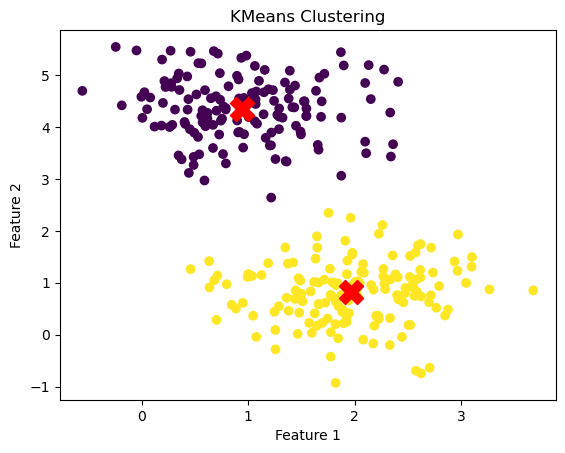

Centroids: [[0.94060243 4.34916815]
 [1.9674274  0.81501647]]


In [13]:
# 修正したKMeansクラスのテストを行うコード
import numpy as np
import matplotlib.pyplot as plt

class KMeans():
    def __init__(self, k=3, random_state=42, maxN_iter=10):
        self.maxN_iter = maxN_iter
        self.prototype = None
        self.k = k
        self.random_state = random_state

    def init_prototype(self, X):
        np.random.seed(self.random_state)
        rand_idx = np.random.permutation(X.shape[0])
        self.prototype = X[rand_idx[:self.k]]
    
    def calculate_distance(self, X):
        distance = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
            distance[:, i] = np.linalg.norm(X - self.prototype[i], axis=1)
        return distance
    
    def calculate_prototype(self, X, labels):
        for i in range(self.k):
            self.prototype[i] = np.mean(X[labels == i], axis=0)
    
    def fit(self, X):
        self.init_prototype(X)
        for _ in range(self.maxN_iter):
            old_prototype = self.prototype.copy()
            distance = self.calculate_distance(X)
            labels = np.argmin(distance, axis=1)
            self.calculate_prototype(X, labels)
            if np.array_equal(old_prototype, self.prototype):
                break
        self.labels = labels

    def predict(self, X_new):
        distance = self.calculate_distance(X_new)
        return np.argmin(distance, axis=1)

# データセットを作成（2つのクラスタ）
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

# KMeansクラスを使用してクラスタリング
model = KMeans(k=2, random_state=42, maxN_iter=100)
model.fit(X)

# クラスタリング結果の可視化
plt.scatter(X[:, 0], X[:, 1], c=model.labels, cmap='viridis', marker='o')
plt.scatter(model.prototype[:, 0], model.prototype[:, 1], s=300, c='red', marker='X')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# クラスタの中心（プロトタイプ）を表示
print("Centroids:", model.prototype)


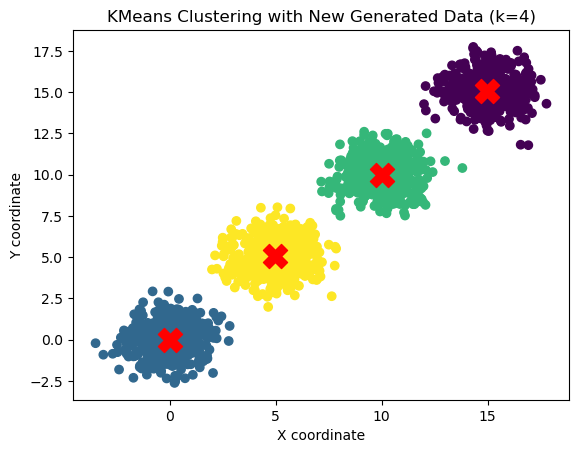

New Data Centroids (k=4): [[ 1.49843552e+01  1.50810596e+01]
 [-1.58299931e-03  2.62418702e-03]
 [ 9.99408883e+00  9.95493760e+00]
 [ 4.95060786e+00  5.04289901e+00]]


In [27]:
# 新しいデータセットを生成
np.random.seed(874)
# x座標: 4つの異なる中心を持つ正規分布からデータを生成
x_new = np.r_[np.random.normal(size=500, loc=0, scale=1),
              np.random.normal(size=500, loc=5, scale=1),
              np.random.normal(size=500, loc=10, scale=1),
              np.random.normal(size=500, loc=15, scale=1)]
# y座標: y座標も同様に4つの異なる中心で生成
y_new = np.r_[np.random.normal(size=500, loc=0, scale=1),
              np.random.normal(size=500, loc=5, scale=1),
              np.random.normal(size=500, loc=10, scale=1),
              np.random.normal(size=500, loc=15, scale=1)]
data_new = np.c_[x_new, y_new]

# 新しいデータでKMeansクラスタリングを実行（k=4で）
model_new = KMeans(k=4, random_state=42, maxN_iter=100)
model_new.fit(data_new)

# 新しいデータのクラスタリング結果を可視化（k=4）
plt.scatter(data_new[:, 0], data_new[:, 1], c=model_new.labels, cmap='viridis', marker='o')
plt.scatter(model_new.prototype[:, 0], model_new.prototype[:, 1], s=300, c='red', marker='X')
plt.title('KMeans Clustering with New Generated Data (k=4)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

# 新しいデータでのクラスタの中心（プロトタイプ）を表示（k=4）
print("New Data Centroids (k=4):", model_new.prototype)
